In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv("loan_prediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Data Preprocessing 

### 1. Data Cleaning

### 2. EDA (Analysis)

### 3. Finding and Treating Outliers (if any)

### 4. Feature Selection for model building

### 5. Model Building

### 6. Hyperparameter tuning



In [29]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
data.shape

(614, 13)

In [31]:
data.dropna(inplace=True)

In [32]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [34]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

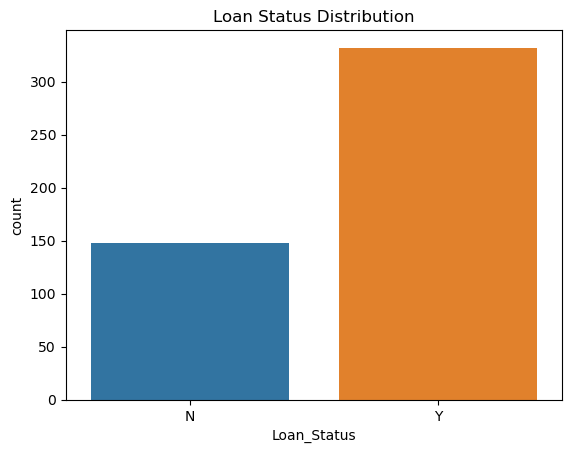

In [35]:
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
# Initialize Label Encoder
le = LabelEncoder()

# Encode binary categorical variables
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  # Assuming 'Y' and 'N'

# For variables with more than two categories, use One-Hot Encoding
data = pd.get_dummies(data, columns=['Education', 'Property_Area', 'Dependents'], drop_first=True)


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  480 non-null    object 
 1   Gender                   480 non-null    int32  
 2   Married                  480 non-null    int32  
 3   Self_Employed            480 non-null    int32  
 4   ApplicantIncome          480 non-null    int64  
 5   CoapplicantIncome        480 non-null    float64
 6   LoanAmount               480 non-null    float64
 7   Loan_Amount_Term         480 non-null    float64
 8   Credit_History           480 non-null    float64
 9   Loan_Status              480 non-null    int32  
 10  Education_Not Graduate   480 non-null    bool   
 11  Property_Area_Semiurban  480 non-null    bool   
 12  Property_Area_Urban      480 non-null    bool   
 13  Dependents_1             480 non-null    bool   
 14  Dependents_2             480 no

In [39]:
data.drop(['Loan_ID'], axis=1, inplace=True)

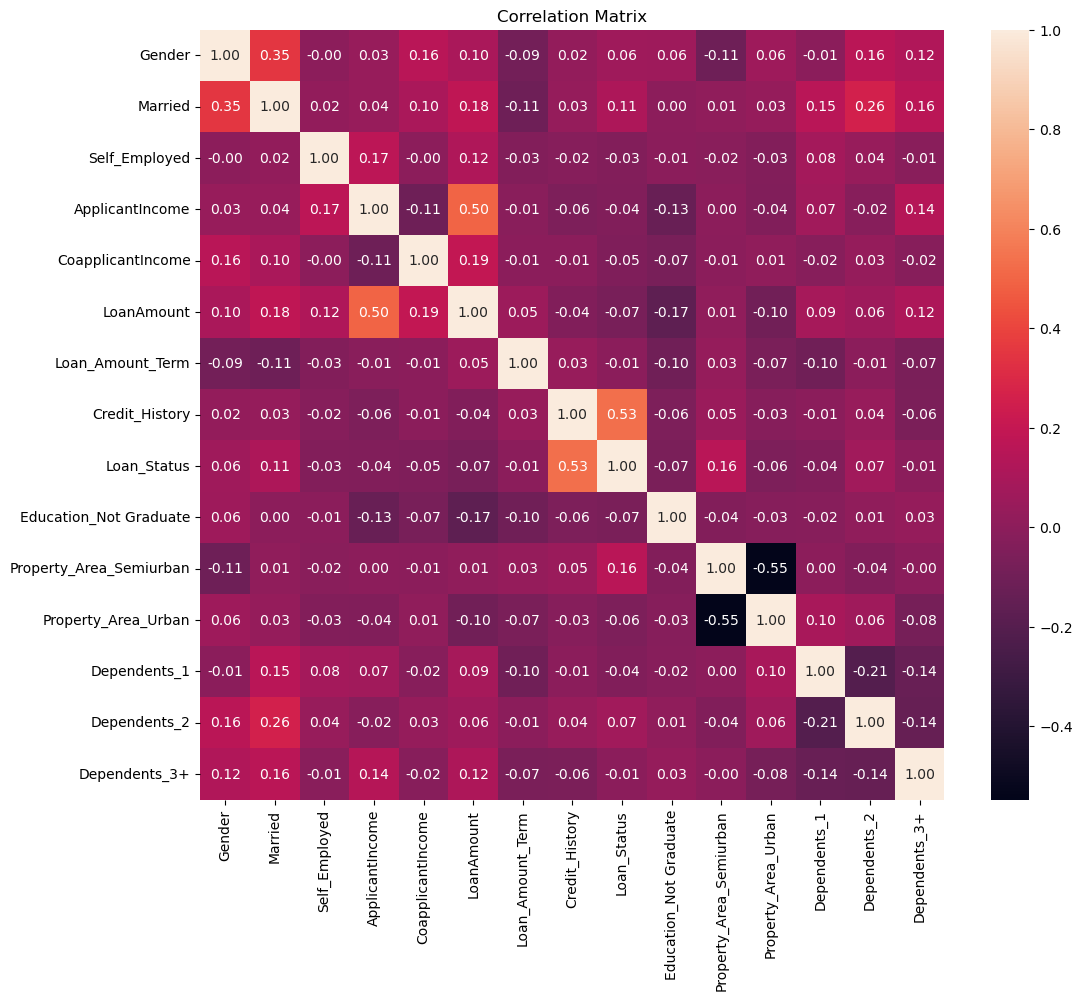

In [40]:
# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [41]:
# Define the columns to keep
columns_to_keep = ['Credit_History', 'Married', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 
                   'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status']
# Drop the unnecessary columns
filtered_data = data[columns_to_keep]

# Display the first few rows of the filtered dataset
filtered_data.head()


,Credit_History,Married,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,1.0,1,True,False,False,False,False,0
2,1.0,1,False,False,False,False,True,1
3,1.0,1,False,False,False,False,True,1
4,1.0,0,False,False,False,False,True,1
5,1.0,1,False,True,False,False,True,1


In [42]:
X = filtered_data.drop(['Loan_Status'], axis=1)
y = filtered_data['Loan_Status']

In [43]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [44]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Initialize regression models
lr = LinearRegression()
dtr = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)

In [47]:
# List of models
models = {'Linear Regression': lr, 'Decision Tree Regressor': dtr, 'Random Forest Regressor': rfr}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    print(f'{name}:\nMSE: {mse:.2f}, R-squared: {r2:.2f}\n')

Linear Regression:
MSE: 0.13, R-squared: 0.36

Decision Tree Regressor:
MSE: 0.13, R-squared: 0.36

Random Forest Regressor:
MSE: 0.13, R-squared: 0.36



In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize classification models
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

In [51]:
# List of classification models
classification_models = {'Logistic Regression': lr_clf, 'Decision Tree Classifier': dt_clf, 'Random Forest Classifier': rf_clf}

# Train and evaluate classification models
for name, model in classification_models.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)
    accuracy = accuracy_score(y_test_clf, y_pred_clf)
    print(f'{name}:\nAccuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(y_test_clf, y_pred_clf)}\n')

Logistic Regression:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96


Decision Tree Classifier:
Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96


Random Forest Classifier:
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89     

In [52]:
#Hyperparameter tuning on RandomForest Classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

# Best parameters and model performance
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test_clf)
acc_best = accuracy_score(y_test_clf, y_pred_best)

print(f'Best model Accuracy: {acc_best}')

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best model Accuracy: 0.8229166666666666


# Loan Application Status Prediction

## Steps Involved:
1. **Data Preprocessing**  
   - Handling missing values and cleaning the dataset.
   - Encoding categorical variables for analysis.
   - Dropping irrelevant columns.

2. **Exploratory Data Analysis (EDA)**  
   - Visualizing the distribution of the target variable (`Loan_Status`).
   - Checking correlations between features.

3. **Feature Selection**  
   - Selecting the most relevant features to include in the model.
   - Dropping columns that do not contribute much to prediction accuracy.

4. **Model Building**  
   - Implementing regression models (Linear Regression, Decision Tree, Random Forest) to predict the target variable.
   - Implementing classification models (Logistic Regression, Decision Tree Classifier, Random Forest Classifier) to classify loan status.

5. **Model Evaluation**  
   - Evaluating models using metrics like Mean Squared Error (MSE) and R-squared for regression tasks.
   - For classification, calculating accuracy and generating classification reports.

6. **Hyperparameter Tuning**  
   - Fine-tuning the Random Forest Classifier with GridSearchCV to optimize model performance.

---

## 1. Data Preprocessing
   - Checked for missing values and dropped rows with missing data.
   - Categorical variables like `Gender`, `Married`, `Self_Employed`, and `Loan_Status` were label-encoded.
   - Performed one-hot encoding for variables with more than two categories (`Education`, `Property_Area`, `Dependents`).
   - Dropped irrelevant columns like `Loan_ID`.

## 2. Exploratory Data Analysis (EDA)
   - Plotted the distribution of `Loan_Status` using a count plot to visualize the balance of approved vs. rejected loans.
   - Generated a correlation matrix heatmap to understand relationships between variables.

## 3. Feature Selection
   - Selected key features such as:
     - **Credit_History** (most significant predictor)
     - **Married** status, **Dependents** (encoded)
     - **Property_Area** (encoded)
   - Dropped less important features to simplify the model and avoid overfitting.

## 4. Model Building
   - For **Regression Tasks** (to predict numerical values):
     - Linear Regression
     - Decision Tree Regressor
     - Random Forest Regressor
   - For **Classification Tasks** (to predict loan approval):
     - Logistic Regression
     - Decision Tree Classifier
     - Random Forest Classifier

## 5. Model Evaluation
   - **Regression Evaluation**:
     - Mean Squared Error (MSE) and R-squared were used to evaluate regression models.
   - **Classification Evaluation**:
     - Accuracy score and classification reports were generated for classification models.

## 6. Hyperparameter Tuning
   - Performed GridSearchCV on Random Forest Classifier to tune hyperparameters (`n_estimators`, `max_depth`, `min_samples_split`).
   - Identified the best set of hyperparameters and re-evaluated the model's performance.

---

### Key Findings:
- **Random Forest Classifier** performed the best in classification tasks after hyperparameter tuning.
- **Credit_History** was identified as the most important feature in predicting loan approval status.
